---

# The $k$-Nearest Neighbors Algorithm

---

## Introduction

K Nearst Neighbors or KNN is a non parametric algorithm, that is use to classify data points without any labels and any perior knowledge. It is a supervised learning algorithm, but it dosent need any training data. It just store the traning data and use it to classify the test data. It is a simple algorithm, but it is very powerful. It is used in many applications like recommender systems, image classification, and many more.

While using KNN, we need to choose the value of K, which is the number of nearest neighbors to be considered. If we choose a small value of K, then the algorithm will be very sensitive to the noise in the data. If we choose a large value of K, then the algorithm will be very slow and might overfit the data. 

--- 

## Algorithm

1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
 - 3.1 Calculate the distance between the query example and the current example from the data.
 - 3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

Below is the mathmatical derivation of the algorithm for classification:

1. **Calculate distance** between the new data point (x) and all existing data points in the dataset.

Typically, the Euclidean distance is used for this purpose:

$$
\text{distance}(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

where x and y are the feature vectors of two data points, and n is the number of features.

2. **Find the k-nearest neighbors** of the new data point (x) based on the calculated distances.

Select the k data points in the dataset with the smallest distances to x.

3. **Determine the majority class** among the k-nearest neighbors.

For each class, count the number of occurrences among the k-nearest neighbors:

$$
\text{count}(\text{class}_i) = \sum_{j=1}^{k} I(y_j = \text{class}_i)
$$

where I is an indicator function that equals 1 if the condition is true and 0 otherwise, $y_j$ is the class of the j-th nearest neighbor, and $\text{class}_i$ is the i-th class in the dataset.

4. **Assign the majority class** to the new data point (x).

$$
\text{predicted\_class}(x) = \text{argmax}(\text{count}(\text{class}_i)) \quad \text{for} \ i = 1 \ \text{to} \ m
$$

where m is the number of classes.


### The strategy to select the value of K:

- There are no pre-defined statistical methods to find the most favorable value of K.
- Initialize a random K value and start computing.
- Choosing a small value of K leads to unstable decision boundaries.
- The substantial K value is better for classification as it leads to smoothening the decision boundaries.
- Derive a plot between error rate and K denoting values in a defined range. Choose the K value having the minimum error rate. 

---

## Illustration

Below is the picture with k equals to 3 or 7. The dot without corlor is the test data point. The dot with color is the training data point. The color of the test data point will be the color of the most frequent color of the training data points in the circle with radius k.

<img src="https://miro.medium.com/v2/resize:fit:405/0*rc5_e6-6AHzqppcr" width="400" >

---

## Advantages and Disadvantages

### Advantages

- Simple to understand and implement
- Versatile: Can be used for classification, regression, and search
- No assumptions about data

### Disadvantages

- High prediction cost (with large N)
- Not good with high dimensional data
- Categorical features don’t work well

---

## Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Set theme for plotting
sns.set_theme()


In [7]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]   #point label and distance
        neighbors.append(temp_data) #add into list 
        
    neighbors.sort(key = lambda x : x[-1]) #sort based on last element in temp_data
    
    return neighbors[:k]


def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k
    


def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)
    

The below plots showed that by implementing the KNN algorithm, we can classify the new unknow data points into the most frequent class of the K nearest neighbors.

Text(0.5, 1.0, 'Test Data: Unknow Yellow points')

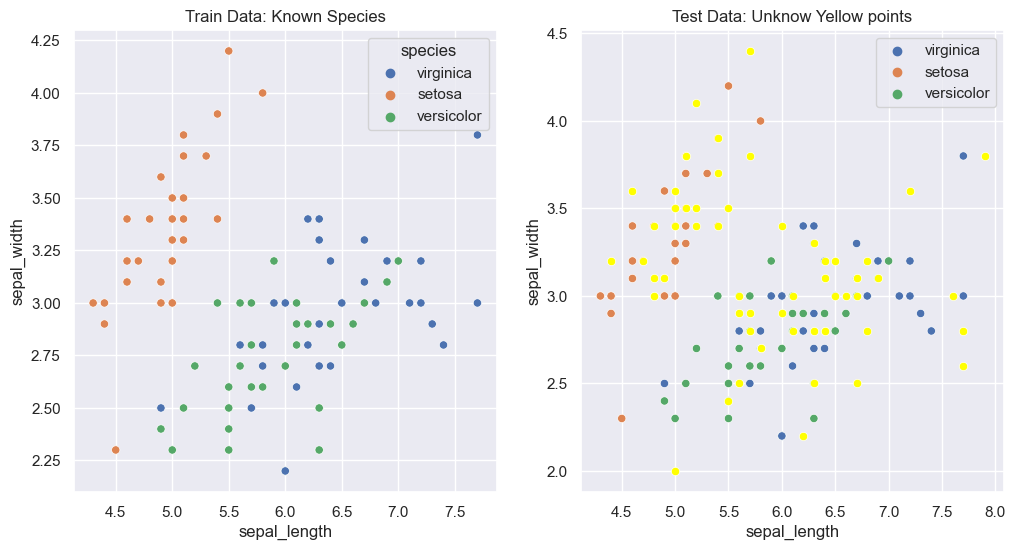

In [84]:
#import iris dataset to implement KNN
iris = sns.load_dataset('iris')
iris.head()

#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis = 1), 
                                                    iris['species'], test_size = 0.4, random_state = 42)

#plot two graphs side by side
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

#plot the train data one left side of the plot
sns.scatterplot(x = X_train['sepal_length'], y = X_train['sepal_width'], hue = y_train, ax = ax[0])
ax[0].set_title('Train Data: Known Species')

#add test data to the plot withouth species in yellow
sns.scatterplot(x = X_train['sepal_length'], y = X_train['sepal_width'], hue = y_train, ax = ax[1])
sns.scatterplot(x = X_test['sepal_length'], y = X_test['sepal_width'], color = 'yellow', ax = ax[1])
ax[1].set_title('Test Data: Unknow Yellow points')


Classification Error:  0.016666666666666666 with k =  4


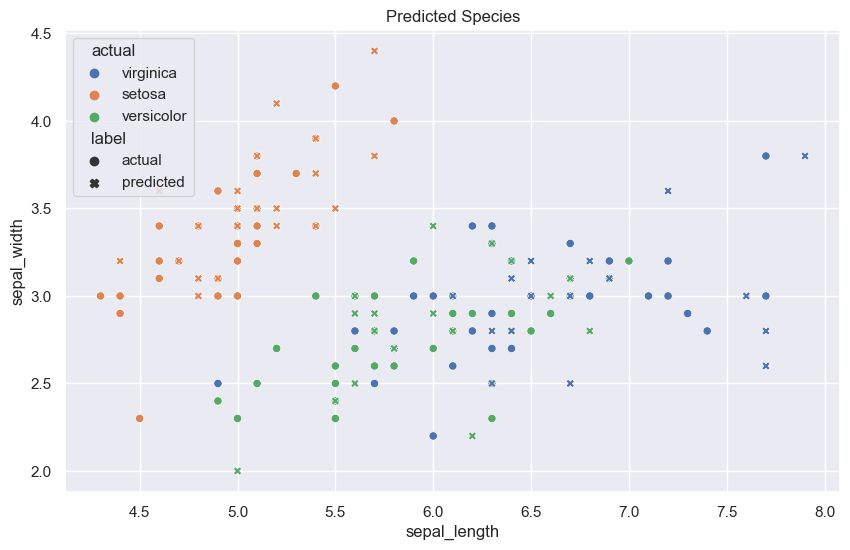

In [104]:
#select a k value and predict the species of the test data
k = 4
predictions = []
for point in X_test.values:
    predictions.append(KNN_Predict(point, X_train.values, y_train.values, k))

#create a dataframe to store the presictions with actual x_test and y_test, add a column "predicted" to the dataframe 
df_predict = pd.DataFrame({'sepal_length': X_test['sepal_length'], 
                   'sepal_width': X_test['sepal_width'], 'actual': y_test, 'predicted': predictions,
                   'label': 'predicted'})

#create a dataframe for train data in same format as above dataframe
df_train = pd.DataFrame({'sepal_length': X_train['sepal_length'],
                            'sepal_width': X_train['sepal_width'], 'actual': y_train, 'predicted': y_train,
                            'label': 'actual'})

#concatenate the two dataframes
df = pd.concat([df_train, df_predict])


#plot the data with the predicted species and actual train data, but using different shapes for predicted and actual
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = df['sepal_length'], y = df['sepal_width'], hue = df['actual'], style = df['label'], ax = ax)
ax.set_title('Predicted Species')

#calculate the classification error

print(f"Classification Error: ", 
      classification_error(X_test.values, y_test.values, X_train.values, y_train.values, k),"with k = ", k)


Text(0, 0.5, 'Classification Error')

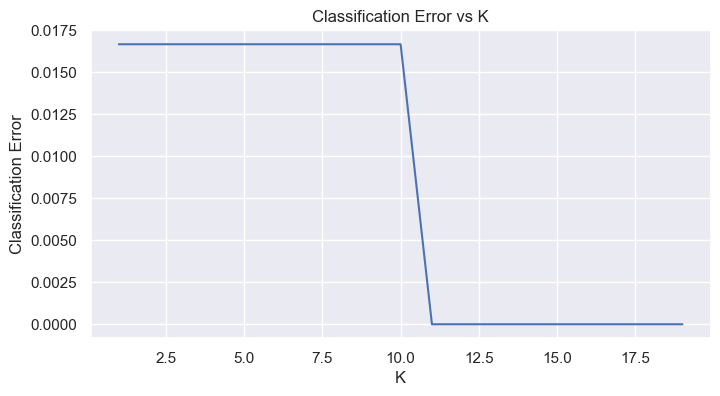

In [94]:
#find the best k value
k_values = range(1, 20)
errors = []
for k in k_values:
    errors.append(classification_error(X_test.values, y_test.values, X_train.values, y_train.values, k))

#plot the error vs k values
fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(x = k_values, y = errors, ax = ax)
ax.set_title('Classification Error vs K')
ax.set_xlabel('K')
ax.set_ylabel('Classification Error')


---

# Recommender Systems with $k$-Nearest Neighbors

KNN can be applied to recommender systems. The idea is to find the movie or song that have the most similar ratings as the user’s current movie or song. Youtube, Netflix, Amazon, Pinterest, and long list of other internet products all rely on recommender systems to filter millions of contents and make personalized recommendations to their users. Recommender systems are well-studied and proven to provide tremendous values to internet businesses and their consumers.



In [9]:
import numpy as np
import pandas as pd

music = pd.read_csv('top2018.csv')
music1 = music.drop(['artists','id'],axis = 1)
music1.set_index("name", drop = False, inplace = True)
music1.head(5)

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,
God's Plan,God's Plan,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
SAD!,SAD!,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
rockstar (feat. 21 Savage),rockstar (feat. 21 Savage),0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
Psycho (feat. Ty Dolla $ign),Psycho (feat. Ty Dolla $ign),0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
In My Feelings,In My Feelings,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [10]:
def music_recommendations(music_name, df, k):
    categories = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

    X = df[categories].to_numpy()
    y = df["name"].to_numpy()

    point = df[categories].loc[music_name].to_numpy()
    neighbors = k_nearest_neighbors(point, X, y, k+1)
    return [x[1] for x in neighbors[1:]]

In [11]:

recommendations = music_recommendations("God's Plan", music1, 3)

print("Music Recommendations")
for i, music in enumerate(recommendations):
    print(f"{i+1}. {music}")

Music Recommendations
1. What Lovers Do
2. Wolves
3. lovely (with Khalid)



For example as above, if the user is currently listening to the song "God's Plan", then the recommender system will find the most similar songs to "God's Plan" and recommend them to the user. To me, it makes sense while listening to "God's Plan", I will like to listen to "lovely (with Khalid)".

By simply implementing the KNN algorithm, we can build a recommender system, which is by finds the most similar songs to the song that the user is currently listening to. It may not be the best recommender system, but it is a good start.

---

# Conclusion

KNN is a simple and powerful non parametric algorithm. It can be applied to classification, regression problems and also can be applied to recommender systems to find the most similar items to the item that the user is currently using. It is a very useful algorithm and it is used in many applications.

